# Retail Loyalty Program Analysis

## Table of Contents

- [Table of Contents](#content)
- [Introduction](#intro)
    - [Project Description](#21)
    - [Objectives](#22)
    - [Dataset Description](#23)
- [Data Pre-Processing](#pra)
    - [Load Library & Dataset](#31)
    - [Data Overview](#32)
    - [Fix Column Name](#33)
    - [Remove Duplicate](#34)
    - [Handling Missing Values](#35)
    - [Convert Data Types](#36)
- [Exploratory Data Analysis (EDA)](#analisa)
    - [Statistic Summary](#41)
    - [Univariate Analysis](#42)
    - [Handling Outlier](#43)
    - [Bivariate Analysis](#44)
        - [Number of Purchases per Day](#441)
        - [Number of Customers](#442)
        - [Number of Purchases per Customer](#443)
        - [Average Purchase Size](#444)
        - [Purchase Frequency for Loyalty Program](#445)
    - [Multivariate Analysis](#45)
    - [Cohort Analysis](#46)
        - [Retention by Month](#462)
        - [Retention Loyalty Program](#463)
- [Hypothesis Test](#test)
- [Conclusion](#kesimpulan)

## Introduction

In this project, we will analyze Loyalty Program Analysis. Before that it is very important to understand the scope of this project.<a id='intro'></a>

### Project Description

Home World is a company engaged in retail building materials. Each customer has a membership card, where to join the loyalty program you can subscribe for $ 20 / month. The program includes discounts, special offers and gifts.<a id='21'></a>

### Objectives

This project has several analysis points with the following objectives:<a id='22'></a>

**1. Loyalty Program Analysis :**

    - Assess changes in average purchase size for each cohort for loyalty program members/non-members.
    - Assess purchase frequency for loyalty program members/non-members.
      
**2. Hypothesis Testing :**

    - Test the hypothesis that the average purchase size is higher for loyalty program members than for non-members.
    - Formulate statistical hypotheses about the data from the data set and test them.
   
**3. Summary :**
    
    - Provide conclusions from the results of data analysis.
    - Provide solutions or suggestions based on the results of the analysis.

### Dataset Description

There are 2 datasets namely `retail_dataset_us.csv` and `product_codes_us.csv`. This dataset includes the following columns:

Dataset `retail_dataset_us.csv`:

- `purchaseId` — A unique identification number for each purchase transaction.
- `item_ID` — A unique identification number for each item purchased in a transaction.
- `purchasedate` — The date and time the purchase transaction was made.
- `Quantity` — The number of items purchased in one transaction.
- `CustomerID` — A unique identification number for each customer.
- `ShopID` — A unique identification number for each retail store.
- `loyalty_program` — Indicates whether the customer is a member of the loyalty program or not.

Dataset `product_codes_us.csv`:

- `productID` — A unique identification number for each product.
- `price_per_one` — Price per unit (units) of the product.

## Data Pre-Processing

Before the data can be used for the analysis process, a pre-processing stage is needed to prepare the data appropriately. Pre-processing data involves a series of steps to clean, change, and organize data to suit the needs of the analysis or modeling to be performed.<a id='pra'></a>

### Load Libraries & Datasets

<a id='31'></a>
The Python library is a collection of pre-written modules and functions ready to be used by Python developers to extend functionality and efficiency in data analysis processes.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import math as mth
import datetime as dt
import plotly.express as px
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind

In [138]:
retail = pd.read_csv('retail_dataset_us.csv')
product = pd.read_csv('product_codes_us.csv', sep=',')

### Data Overview

<a id='32'></a>
Data overview includes information about the number of entries or observations in the dataset, the number of variables or features that exist, the type of data contained in each variable.

In [139]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


From the information above, we know that there are 105,335 data with 7 variables. Where you can see that the Customer_ID variable has a missing value.

In [140]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


From the information above, we know that there are 3,159 data with 1 variable, where there are no missing values in this dataset.

### Fix Column Name

<a id='33'></a>
By fixing the column names, the dataset becomes easier to understand, analyze and process. Consistent, clear, and descriptive column names also make it easier to understand the context of the data and facilitate data manipulation and visualization.

In [141]:
retail.columns

Index(['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID',
       'loyalty_program', 'ShopID'],
      dtype='object')

In [142]:
retail.columns = retail.columns.str.lower()
retail.columns

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'loyalty_program', 'shopid'],
      dtype='object')

In [143]:
retail.rename(columns={"purchaseid": "purchase_id", "customerid": "customer_id", "purchasedate": "purchase_date",
                       "shopid": "shop_id"}, inplace=True)
retail.columns

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'loyalty_program', 'shop_id'],
      dtype='object')

We update the column names in the retail dataset and make them lower case.

In [144]:
product.columns

Index(['productID', 'price_per_one'], dtype='object')

In [145]:
product.columns = product.columns.str.lower()
product.columns

Index(['productid', 'price_per_one'], dtype='object')

In [146]:
product.rename(columns={"productid": "product_id"}, inplace=True)
product.columns

Index(['product_id', 'price_per_one'], dtype='object')

We update the column names in the retail dataset and make them lower case.

### Remove Duplicated

<a id='34'></a>
Removing duplicated data in a dataset refers to the process of identifying and removing rows or entries that have the same value in all columns or certain sections of the column.

In [147]:
product.duplicated().sum()

0

No duplicate values were found in the product table.

In [148]:
retail.duplicated().sum()

1033

In [149]:
duplicated_rows = retail[retail.duplicated()]
duplicated_rows

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
5345,537265,21499,24,2016-12-06 11:26:00,21598.0,0,Shop 7
5863,540803,21485,0,2017-01-11 12:30:00,20348.0,0,Shop 17
6893,540524,21326,11,2017-01-09 12:53:00,22414.0,1,Shop 6
7821,537192,22585,0,2016-12-05 13:42:00,22081.0,1,Shop 6
10806,537772,22080,4,2016-12-08 12:35:00,23722.0,1,Shop 27
...,...,...,...,...,...,...,...
105164,542224,22178,5,2017-01-26 12:45:00,23567.0,1,Shop 1
105173,544153,82552,1,2017-02-16 12:11:00,21035.0,0,Shop 25
105178,540839,21123,0,2017-01-11 15:42:00,22470.0,1,Shop 29
105229,543277,21533,0,2017-02-06 14:33:00,21487.0,0,Shop 0


In [150]:
total_data = len(retail)
total_duplicates = retail.duplicated().sum()
percentage_duplicates = (total_duplicates / total_data) * 100
percentage_duplicates

0.9806806854321926

The total duplicate values in the retail dataset is 0.98%, this value is not too big and we decided to delete duplicated values.

In [151]:
retail = retail.drop_duplicates()
retail.duplicated().sum()

0

No more duplicate values were found in the retail dataset.

### Handling Missing Values

<a id='35'></a>
Handling missing values (Handling Missing Values) refers to the process of dealing with and treating values that are empty or missing in a dataset.

In [152]:
retail.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_date          0
customer_id        36148
loyalty_program        0
shop_id                0
dtype: int64

In [153]:
missing_percentage = retail.isna().mean() * 100
missing_percentage

purchase_id         0.000000
item_id             0.000000
quantity            0.000000
purchase_date       0.000000
customer_id        34.657054
loyalty_program     0.000000
shop_id             0.000000
dtype: float64

There are about 34% missing values in the customer_id column. The amount of data is too much to do the deletion process.

In [154]:
filtered_dataset = retail.loc[retail['customer_id'].isnull()]
filtered_dataset

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
6,540468,22189,0,2017-01-07 13:55:00,NaN,0,Shop 0
7,541424,79321,1,2017-01-17 17:57:00,NaN,0,Shop 0
8,538883,22891,0,2016-12-14 15:56:00,NaN,0,Shop 0
11,541696,22197,4,2017-01-20 18:08:00,NaN,0,Shop 0
16,539744,22300,5,2016-12-21 15:21:00,NaN,0,Shop 0
...,...,...,...,...,...,...,...
105325,536982,20719,69,2016-12-03 14:27:00,NaN,0,Shop 0
105326,540681,22227,1,2017-01-10 16:25:00,NaN,0,Shop 0
105327,538349,22625,0,2016-12-10 14:59:00,NaN,0,Shop 0
105329,540154,22134,3,2017-01-05 11:30:00,NaN,0,Shop 0


In [155]:
filtered_dataset['shop_id'].unique()

array(['Shop 0', 'Shop 25', 'Shop 6', 'Shop 21', 'Shop 23'], dtype=object)

If we check, `customer_id` and shop_id are not representative enough to fill in the missing value in `customer_id` because the missing `customer_id` is found in shop 0, 25, 21 and 23. What we know is that customers with missing `customer_id` are customers who not involved in the `loyalty_program`. Therefore we decided to fill in missing values with 0.

In [156]:
retail['customer_id'] = retail['customer_id'].fillna(0)
retail.isna().sum()

purchase_id        0
item_id            0
quantity           0
purchase_date      0
customer_id        0
loyalty_program    0
shop_id            0
dtype: int64

There are no missing values in the `customer_id` column.

In [157]:
product.isna().sum()

product_id       0
price_per_one    0
dtype: int64

There are no empty values in the product dataset.

### Convert Data Types

<a id='36'></a>
Converting data types in a dataset refers to the process of changing the format or type of data type from one form to another.

In [158]:
retail.dtypes

purchase_id         object
item_id             object
quantity             int64
purchase_date       object
customer_id        float64
loyalty_program      int64
shop_id             object
dtype: object

Based on my observations, `purchase_id` and `customer_id` should have an object data type, because it is a purchase id / customer id which does not need to be done mathematically. And `purchase_date` must have data type date.

In [159]:
retail['purchase_date'] = pd.to_datetime(retail['purchase_date'])
retail['customer_id'] = retail['customer_id'].astype(int)
retail['customer_id'] = retail['customer_id'].astype(str)
retail.dtypes

purchase_id                object
item_id                    object
quantity                    int64
purchase_date      datetime64[ns]
customer_id                object
loyalty_program             int64
shop_id                    object
dtype: object

The data type in the retail dataset is appropriate.

In [160]:
product.dtypes

product_id        object
price_per_one    float64
dtype: object

The data type in the product dataset is appropriate.

## Exploratory Data Analysis (EDA)

This process is a method used to understand and analyze data before running a model or a more in-depth statistical analysis. Through EDA, data is explored systematically using various visualization techniques and descriptive statistics. The main goal of EDA is to identify patterns, trends and anomalies in data, and understand the relationships between variables.<a id='analysis'></a>

### Statistics Summary

<a id='41'></a>
The statistical summary function that is commonly used in data analysis is describe() in the pandas library. This function provides summary descriptive statistics for each numeric column in the DataFrame, including data count, mean, standard deviation, minimum value, quartile, and maximum value.

In [161]:
retail.describe()

,quantity,loyalty_program
count,104302.000000,104302.000000
mean,7.883003,0.224464
std,329.565540,0.417231
min,-74216.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,74214.000000,1.000000


**Conclusion** :

1. There are a total of 104,302 data where there is a fairly large gap between the mean and the median which indicates that the distribution of the data may be asymmetrical and have a long tail on one side of the distribution. In such cases, the data distribution tends to have skewness. But of course we have to do further analysis to determine the distribution.


2. There is a minus (-) value in the `quantity` column, this is quite strange because every purchase should have a quantity of 1. So we need to check the data in the `quantity` column again.


3. It seems that the `loyalty_program` column only has a value of 0 and 1 indicating whether the customer is included in the loyalty program or not. Not much can be concluded from this column, because if you look at the data this column might be categorical.

In [162]:
product.describe()

,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


**Conclusion** :

1. Out of a total of 3159 products, the average price per unit is 2.9. The lowest price is 0 and the highest price is 175. This is quite strange because there are product prices that are 0 or free, so we need to check this column again.

#### Check Column Quantity - Retail Dataset

<a id='411'></a> This process was carried out because we found a quantity that we thought was odd, namely the value 0 and negative (1).

In [163]:
count_negative = (retail['quantity'] < 0).sum()
count_nol = (retail['quantity'] == 0).sum()
total_data = len(retail)

percentage_negative = (count_negative / total_data) * 100
percentage_nol = (count_nol / total_data) * 100

df_output = pd.DataFrame({'Condition': ['= 0', '< 0'],
                          'Count': [count_nol, count_negative],
                          'Percentage': [percentage_nol, percentage_negative]})

df_output

,Condition,Count,Percentage
0,= 0,32362,31.027209
1,< 0,2076,1.990374


There are 31% of the data quantity whose value is zero in one transaction, while 1.9% of the data has a minus (-) quantity in one transaction.

In [164]:
df_zero_quantity = retail.loc[retail['quantity'] == 0]
df_zero_quantity.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28
5,538379,22965,0,2016-12-12 11:26:00,22805,1,Shop 20
6,540468,22189,0,2017-01-07 13:55:00,0,0,Shop 0


In [165]:
df_zero_quantity['loyalty_program'].unique()

array([1, 0], dtype=int64)

In [166]:
df_zero_quantity['shop_id'].unique()

array(['Shop 2', 'Shop 28', 'Shop 20', 'Shop 0', 'Shop 1', 'Shop 16',
       'Shop 30', 'Shop 24', 'Shop 23', 'Shop 21', 'Shop 22', 'Shop 5',
       'Shop 9', 'Shop 26', 'Shop 6', 'Shop 14', 'Shop 10', 'Shop 13',
       'Shop 7', 'Shop 15', 'Shop 12', 'Shop 4', 'Shop 3', 'Shop 8',
       'Shop 25', 'Shop 18', 'Shop 27', 'Shop 11', 'Shop 17', 'Shop 29',
       'Shop 19'], dtype=object)

After comparing `quantity` with `loyalty_program` and `shop_id`, there were no corresponding patterns to describe the data set with `quantity` zero. Both loyal and disloyal customers have transactions with a quantity of 0, and transactions with a zero quantity are also found in almost all `shop_id`.

In [167]:
df_negative_quantity = retail.loc[retail['quantity'] < 0]
df_negative_quantity

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
64,C539944,22776,-2,2016-12-23 11:38:00,20239,0,Shop 27
109,C542910,20726,-2,2017-02-01 15:38:00,23190,1,Shop 19
112,C542426,22418,-25,2017-01-28 09:32:00,19825,0,Shop 27
253,C539726,22791,-11,2016-12-21 14:24:00,22686,1,Shop 3
344,C544034,21878,-2,2017-02-15 11:28:00,20380,0,Shop 9
...,...,...,...,...,...,...,...
105160,C541650,M,-2,2017-01-20 11:44:00,0,0,Shop 0
105172,C540246,79320,-2,2017-01-05 15:43:00,18760,0,Shop 19
105211,C539467,22801,-2,2016-12-19 12:46:00,20723,0,Shop 13
105250,C540847,22197,-3,2017-01-11 17:35:00,19137,0,Shop 0


In [168]:
df_negative_quantity['loyalty_program'].unique()

array([0, 1], dtype=int64)

In [169]:
df_negative_quantity['shop_id'].unique()

array(['Shop 27', 'Shop 19', 'Shop 3', 'Shop 9', 'Shop 4', 'Shop 0',
       'Shop 18', 'Shop 15', 'Shop 21', 'Shop 5', 'Shop 23', 'Shop 14',
       'Shop 26', 'Shop 28', 'Shop 8', 'Shop 17', 'Shop 7', 'Shop 11',
       'Shop 6', 'Shop 16', 'Shop 22', 'Shop 20', 'Shop 13', 'Shop 1',
       'Shop 24', 'Shop 10', 'Shop 29', 'Shop 30', 'Shop 25', 'Shop 2',
       'Shop 12'], dtype=object)

After comparing `quantity` with `loyalty_program` and `shop_id`, there was no pattern related to explaining the data group with negative `quantity`. Both loyal and disloyal customers have transactions with a negative quantity, and transactions with a negative quantity are also found in almost all `shop_id`.

#### New Retail Dataset

<a id='412'></a>
The amount of data that has a quantity of 0 and negative exceeds 30% of the total data, therefore we will carry out 2 stages of the process, namely:

1. Delete transaction values with a quantity of 0 and negative.
2. Replacing the transaction value of quantity 0 and negative with the middle value of the quantity.

In [170]:
new_retail = retail.drop(retail[retail['quantity'] < 1].index).reset_index(drop=True)

In [171]:
count_negative = (new_retail['quantity'] < 0).sum()
count_nol = (new_retail['quantity'] == 0).sum()
total_data = len(new_retail)

percentage_negative = (count_negative / total_data) * 100
percentage_nol = (count_nol / total_data) * 100

df_output = pd.DataFrame({'Condition': ['= 0', '< 0'],
                          'Count': [count_nol, count_negative],
                          'Percentage': [percentage_nol, percentage_negative]})

df_output

,Condition,Count,Percentage
0,= 0,0,0.0
1,< 0,0,0.0


The new_retail dataset does not contain transactions with zero or negative `quantity`.

In [172]:
median_quantity = retail['quantity'].median()
rounded_median = round(median_quantity)
retail_modified = retail.copy()  
retail_modified.loc[retail['quantity'] < 1, 'quantity'] = rounded_median

In [173]:
count_negative = (retail_modified['quantity'] < 0).sum()
count_nol = (retail_modified['quantity'] == 0).sum()
total_data = len(retail_modified)

percentage_negative = (count_negative / total_data) * 100
percentage_nol = (count_nol / total_data) * 100

df_output = pd.DataFrame({'Condition': ['= 0', '< 0'],
                          'Count': [count_nol, count_negative],
                          'Percentage': [percentage_nol, percentage_negative]})

df_output

,Condition,Count,Percentage
0,= 0,0,0.0
1,< 0,0,0.0


The retail_modified dataset does not contain transactions with zero or negative quantity.

In [174]:
print('Banyak Data pada retail dataset:', retail.shape[0])
print('Banyak Data pada new_retail dataset:', new_retail.shape[0])
print('Banyak Data pada retail_modified dataset:', retail_modified.shape[0])

Banyak Data pada retail dataset: 104302
Banyak Data pada new_retail dataset: 69864
Banyak Data pada retail_modified dataset: 104302


We decided to use the retail_modified dataset retaining the replaced data to the median value. We don't want to lose 30% of the sample for this analysis, because it could affect the results of the analysis.

In [175]:
retail_modified.duplicated().sum()

151

In [176]:
total_data = len(retail_modified)
total_duplicates = retail_modified.duplicated().sum()
percentage_duplicates = (total_duplicates / total_data) * 100
percentage_duplicates

0.14477191233149891

In [177]:
retail_modified = retail_modified.drop_duplicates()
retail_modified.duplicated().sum()

0

### Univariate Analysis

<a id='42'></a>
The main purpose of univariate analysis is to describe and summarize data in one variable, identify patterns or structures that may exist in the data, and identify outlier or extreme values. Univariate analysis helps provide an initial understanding of the variables themselves before extending the analysis to the relationships between variables (bivariate or multivariate analysis).

In [178]:
retail_modified.describe()

,quantity,loyalty_program
count,104151.000000,104151.000000
mean,9.700733,0.224203
std,234.207369,0.417059
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,74214.000000,1.000000


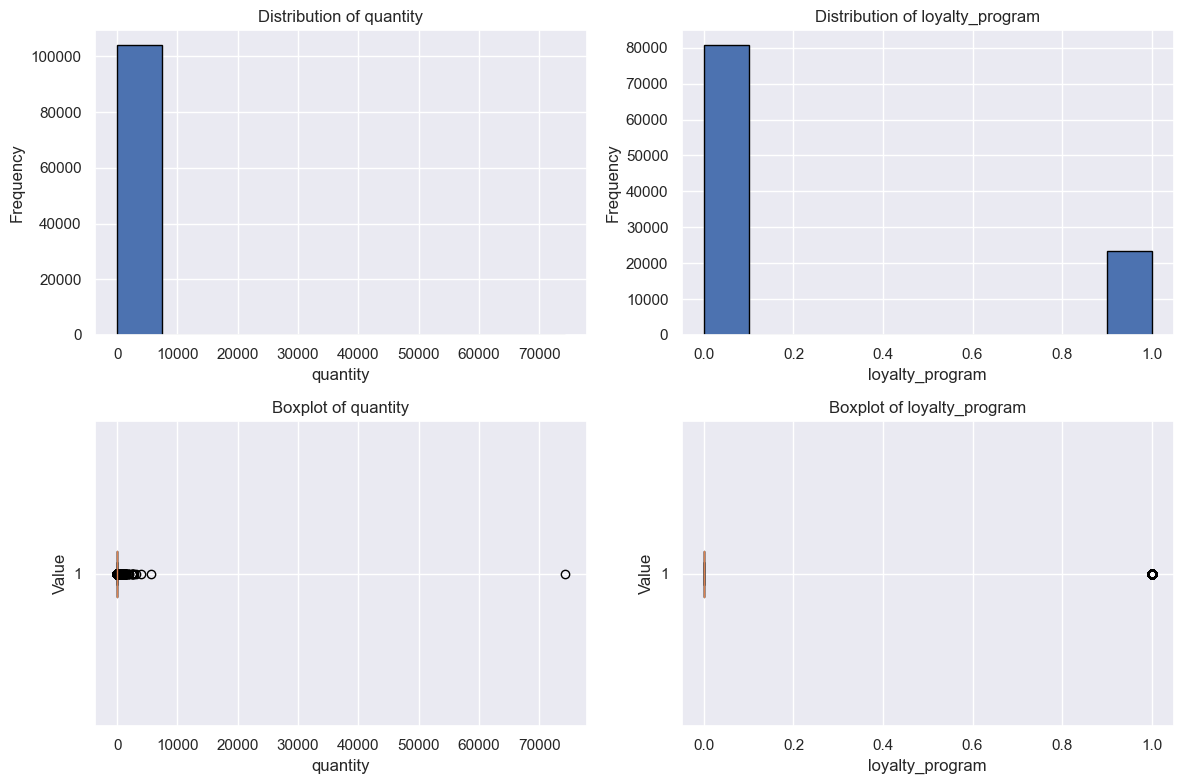

In [179]:
columns = ['quantity', 'loyalty_program']

fig, axs = plt.subplots(2, len(columns), figsize=(12, 8))

for i, col in enumerate(columns):
    # Histogram
    axs[0, i].hist(retail_modified[col], edgecolor='black')
    axs[0, i].set_title(f'Distribution of {col}')
    axs[0, i].set_xlabel(col)
    axs[0, i].set_ylabel('Frequency')

    # Boxplot
    axs[1, i].boxplot(retail_modified[col], vert=False)
    axs[1, i].set_title(f'Boxplot of {col}')
    axs[1, i].set_xlabel(col)
    axs[1, i].set_ylabel('Value')

plt.tight_layout()
plt.show()

There are quite a lot of outliners found in the `quantity` column based on the observation of the boxplot graph. The distribution in the `quantity` column is also not visible, possibly because there is a significant outliner. for the `loyalty_program` column involved only having values 1 and 0, we can call it a categorical variable.

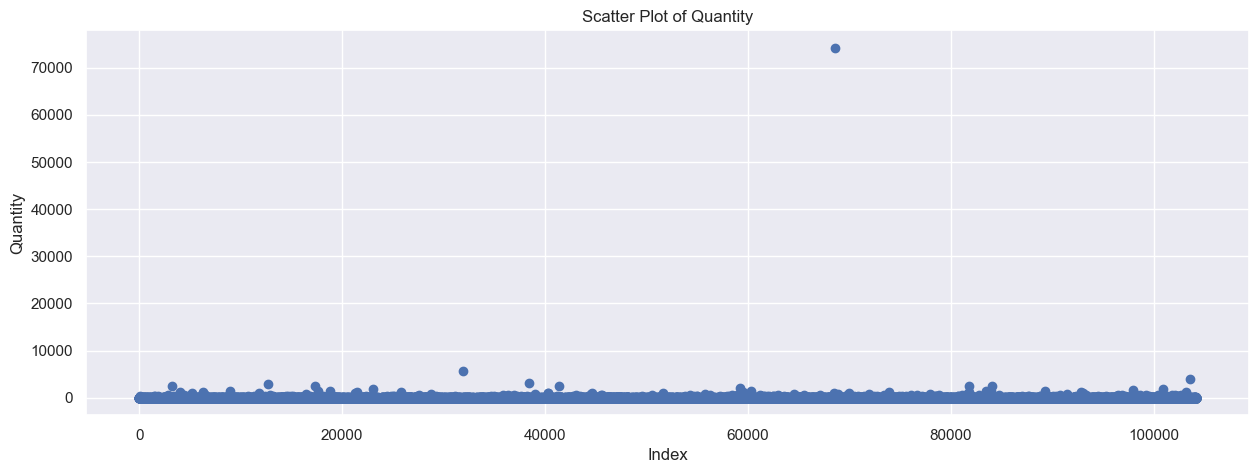

In [180]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(range(len(retail_modified)), retail_modified['quantity'])
ax.set_title('Scatter Plot of Quantity')
ax.set_xlabel('Index')
ax.set_ylabel('Quantity')
plt.show()

We try to display the `quantity` data using a scatter plot, where the distribution is more visible, but we find outliers with quite striking values.

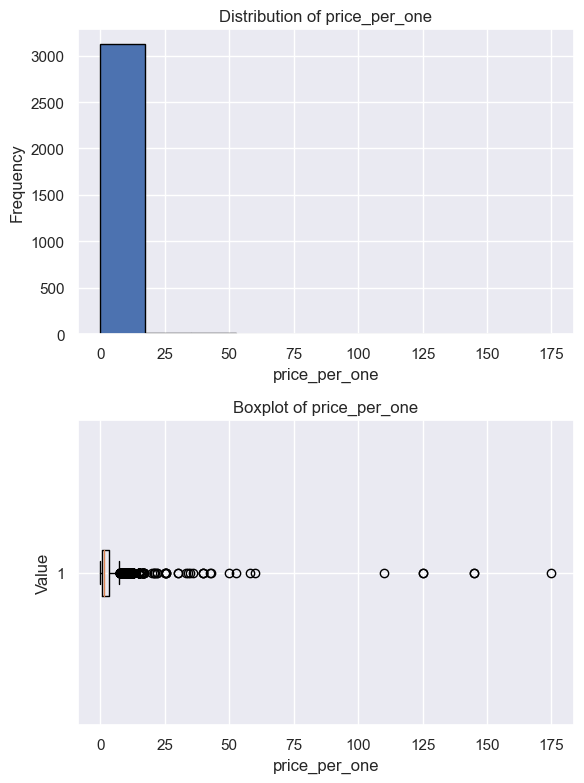

In [181]:
columns = ['price_per_one']

fig, axs = plt.subplots(2, len(columns), figsize=(6, 8))

for i, col in enumerate(columns):
    # Histogram
    axs[0].hist(product[col], edgecolor='black')
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')

    # Boxplot
    axs[1].boxplot(product[col], vert=False)
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

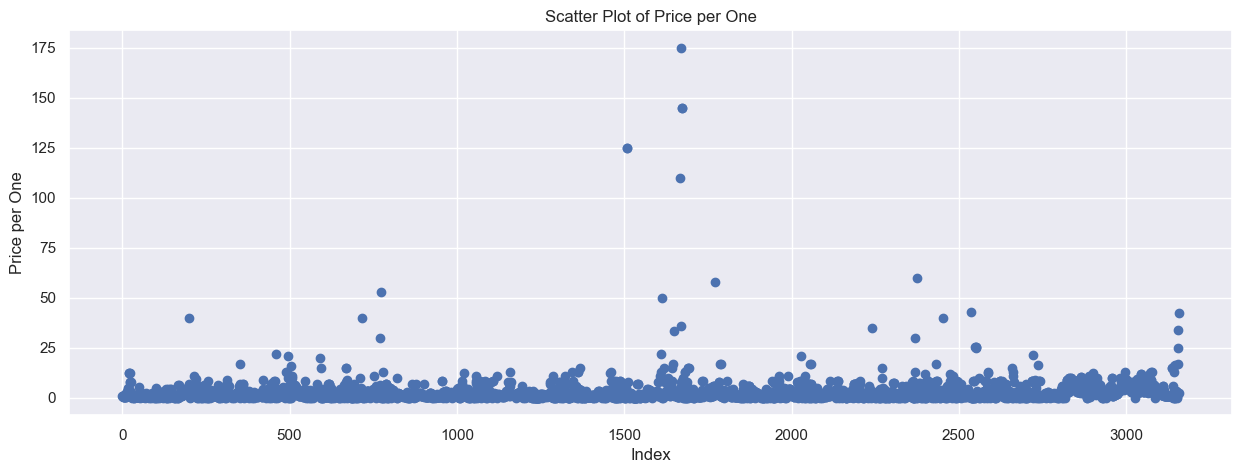

In [182]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(range(len(product)), product['price_per_one'])
ax.set_title('Scatter Plot of Price per One')
ax.set_xlabel('Index')
ax.set_ylabel('Price per One')
plt.show()

At the unit price, we also found quite a lot of outliers so that when displayed with a histogram, the distribution is not very clear.

### Handling Outliers

<a id='43'></a>
Outliers are values that are significantly different from the general pattern of data and have been identified in numerical variables. For that it will be decided whether the outliner needs to be removed or not.

In [183]:
columns = ['quantity']
outlier_percentage = {}

for column in columns:
    column_data = retail_modified[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'quantity': 11616
Percentage of outliers in column 'quantity': 11.15%



There are 11,616 data which are outliners. We decided to change the values of the outliners to the values of the upper and lower bounds, to preserve the number of samples.

In [184]:
# define lower and upper bounds
columns = ['quantity']
lower_bounds, upper_bounds = [], []
for column in columns :
    lower_bound = retail_modified[column].describe()['25%'] - (1.5 * (retail_modified[column].describe()['75%'] -
                                                                          retail_modified[column].describe()['25%']))
    upper_bound = retail_modified[column].describe()['75%'] + (1.5 * (retail_modified[column].describe()['75%'] -
                                                                          retail_modified[column].describe()['25%']))
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [185]:
# create new df with outliers replaced with upper bounds and lower bounds
new_retail_modified = retail_modified.copy()
for n, column in enumerate(columns):
    new_retail_modified[column] = np.where(new_retail_modified[column] < lower_bounds[n], lower_bounds[n], new_retail_modified[column])
    new_retail_modified[column] = np.where(new_retail_modified[column] > upper_bounds[n], upper_bounds[n], new_retail_modified[column])

In [186]:
columns = ['quantity']
outlier_percentage = {}

for column in columns:
    column_data = new_retail_modified[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'quantity': 0
Percentage of outliers in column 'quantity': 0.00%



The outliner has been successfully changed to upper/lower bounds and after checking again, no outliers were found.

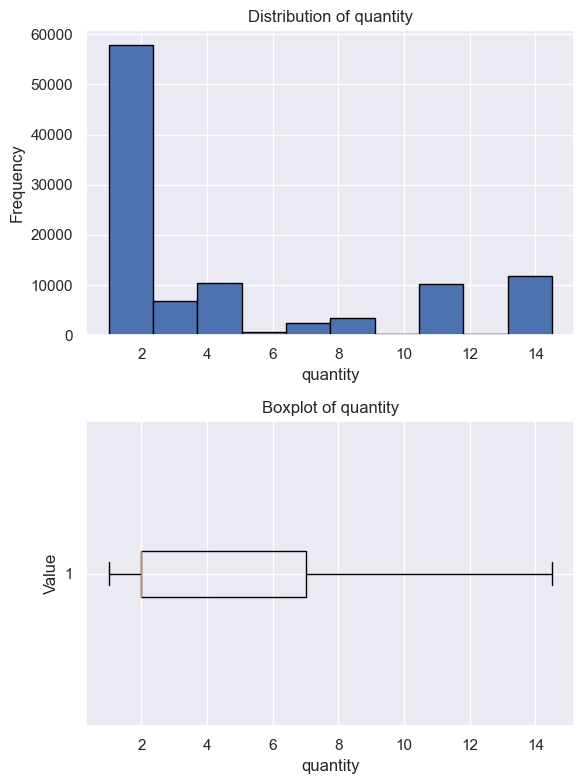

In [187]:
columns = ['quantity']

fig, axs = plt.subplots(2, len(columns), figsize=(6, 8))

for i, col in enumerate(columns):
    # Histogram
    axs[0].hist(new_retail_modified[col], edgecolor='black')
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')

    # Boxplot
    axs[1].boxplot(new_retail_modified[col], vert=False)
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

The distribution of `quantity` is visible, it seems not normally distributed. and no outliers were found on the boxplot.

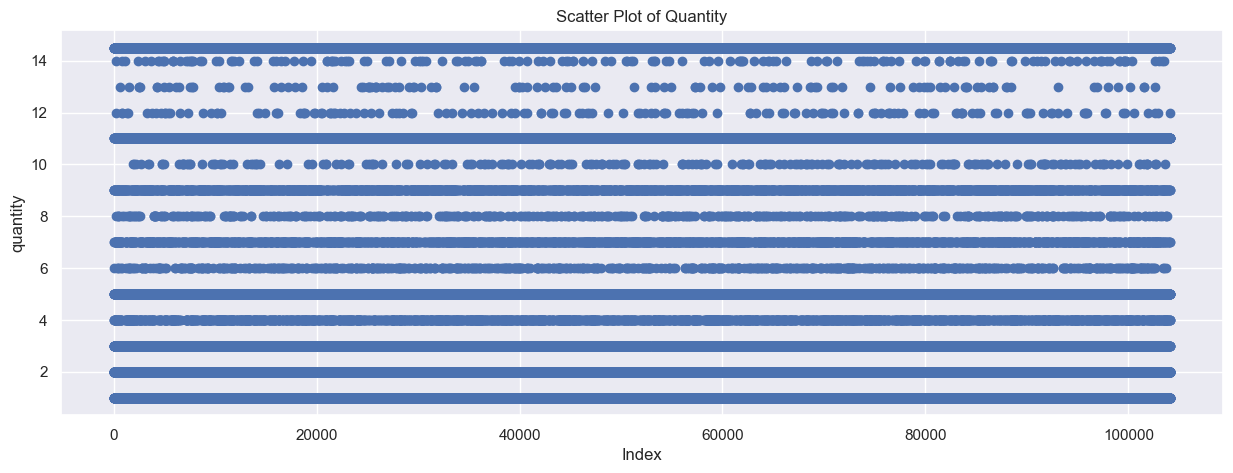

In [188]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(range(len(new_retail_modified)), new_retail_modified['quantity'])
ax.set_title('Scatter Plot of Quantity')
ax.set_xlabel('Index')
ax.set_ylabel('quantity')
plt.show()

Scatter plot `quantity` has also not found any outliers.

In [189]:
columns = ['price_per_one']
outlier_percentage = {}

for column in columns:
    column_data = product[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'price_per_one': 281
Percentage of outliers in column 'price_per_one': 8.90%



There are 281 data which are outliners. We decided to change the values of the outliners to the values of the upper and lower bounds, to preserve the number of samples.

In [190]:
# define lower and upper bounds
columns = ['price_per_one']
lower_bounds, upper_bounds = [], []
for column in columns :
    lower_bound = product[column].describe()['25%'] - (1.5 * (product[column].describe()['75%'] -
                                                                          product[column].describe()['25%']))
    upper_bound = product[column].describe()['75%'] + (1.5 * (product[column].describe()['75%'] -
                                                                          product[column].describe()['25%']))
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [191]:
# create new df with outliers replaced with upper bounds and lower bounds
new_product = product.copy()
for n, column in enumerate(columns):
    new_product[column] = np.where(new_product[column] < lower_bounds[n], lower_bounds[n], new_product[column])
    new_product[column] = np.where(new_product[column] > upper_bounds[n], upper_bounds[n], new_product[column])

In [192]:
columns = ['price_per_one']
outlier_percentage = {}

for column in columns:
    column_data = new_product[column]

    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    outlier_percentage[column] = len(outliers) / len(column_data) * 100

# Display the outlier percentage for each column
for column, percentage in outlier_percentage.items():
    print(f"Count of outliers in column '{column}': {len(outliers)}")
    print(f"Percentage of outliers in column '{column}': {percentage:.2f}%")
    print()

Count of outliers in column 'price_per_one': 0
Percentage of outliers in column 'price_per_one': 0.00%



The outliner has been successfully changed to upper/lower bounds and after checking again, no outliers were found.

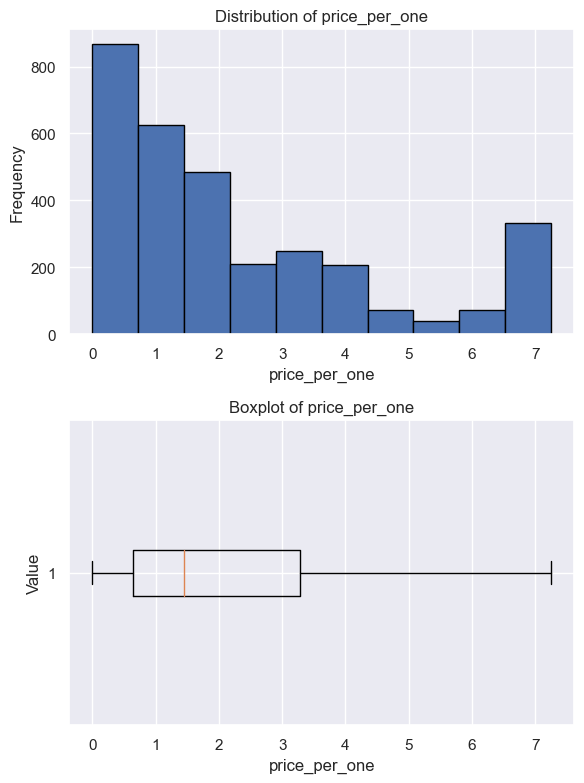

In [193]:
columns = ['price_per_one']

fig, axs = plt.subplots(2, len(columns), figsize=(6, 8))

for i, col in enumerate(columns):
    # Histogram
    axs[0].hist(new_product[col], edgecolor='black')
    axs[0].set_title(f'Distribution of {col}')
    axs[0].set_xlabel(col)
    axs[0].set_ylabel('Frequency')

    # Boxplot
    axs[1].boxplot(new_product[col], vert=False)
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_xlabel(col)
    axs[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

The distribution of `price_per_one` is visible, it seems not normally distributed. and no outliers were found on the boxplot.

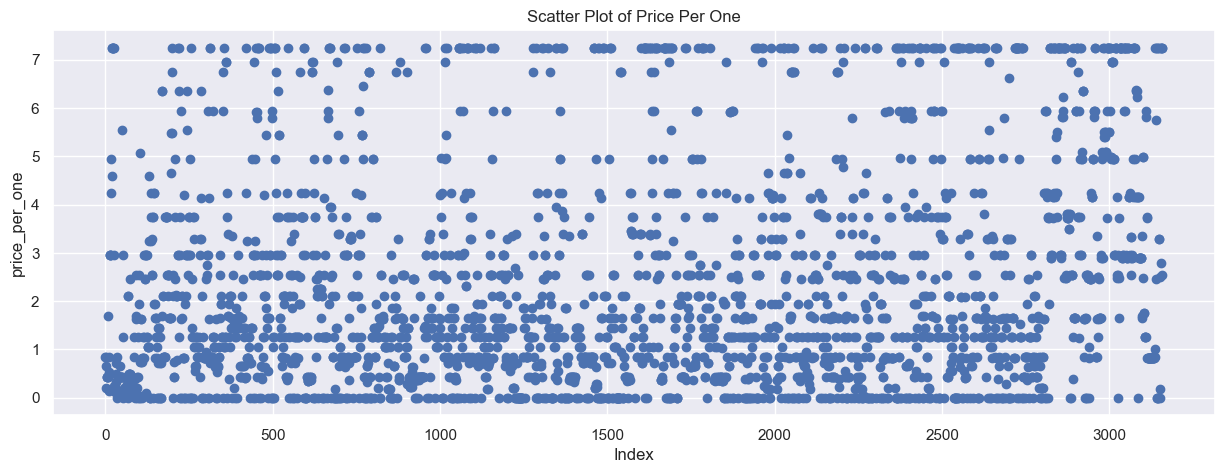

In [194]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(range(len(new_product)), new_product['price_per_one'])
ax.set_title('Scatter Plot of Price Per One')
ax.set_xlabel('Index')
ax.set_ylabel('price_per_one')
plt.show()

The price_per_one scatter plot also has no outliers found.

In [195]:
new_retail_modified.duplicated().sum()

17

In [196]:
total_data = len(new_retail_modified)
total_duplicates = new_retail_modified.duplicated().sum()
percentage_duplicates = (total_duplicates / total_data) * 100
percentage_duplicates

0.01632245489721654

In [197]:
new_retail_modified = new_retail_modified.drop_duplicates()
new_retail_modified.duplicated().sum()

0

### Bivariate Analysis

<a id='44'></a>
Bivariate analysis helps to understand how variables are related to each other and the relationship between the dependent and independent variables present in the dataset.

#### Number of Purchases per Day

<a id='441'></a>Calculate total purchases per day, total by loyal and non loyal.

In [198]:
purchases_by_day = new_retail_modified.groupby(new_retail_modified['purchase_date'].dt.date).size()
purchases_by_day

purchase_date
2016-12-01    3048
2016-12-02    2064
2016-12-03    2183
2016-12-05    2606
2016-12-06    3826
              ... 
2017-02-23    1574
2017-02-24    1289
2017-02-25     977
2017-02-27     782
2017-02-28    1716
Length: 68, dtype: int64

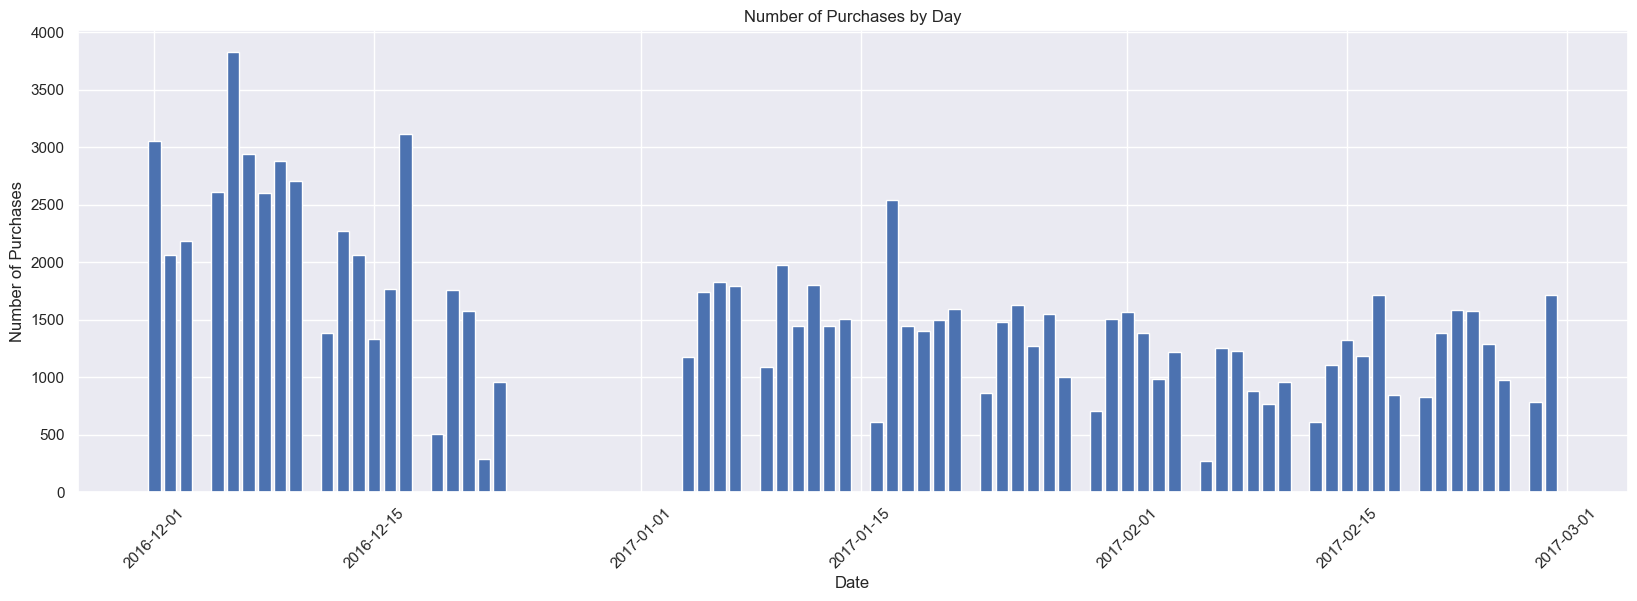

In [199]:
plt.figure(figsize=(20, 6))
plt.bar(purchases_by_day.index, purchases_by_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by Day')
plt.xticks(rotation=45)
plt.show()

In [200]:
# Calculate the minimum and maximum purchase_date
min_purchase_date = new_retail_modified['purchase_date'].min()
max_purchase_date = new_retail_modified['purchase_date'].max()

print("Minimum purchase date:", min_purchase_date)
print("Maximum purchase date:", max_purchase_date)

Minimum purchase date: 2016-12-01 08:26:00
Maximum purchase date: 2017-02-28 17:04:00


**Conclusion :**

- This dataset contains retail data from 1 December 2016 to 28 February 2017 or about 3 months.
- Transactions do not occur every day, especially at the end of December to January 1. There may be no transactions due to the year-end holiday.
- The highest transaction was at the beginning of December, after that the transaction rose and fell but never exceeded the highest transaction in December.

In [201]:
transactions_per_date = new_retail_modified.groupby(['purchase_date', 'loyalty_program']).size().reset_index(name='Transaction Count')
transactions_per_date

,purchase_date,loyalty_program,Transaction Count
0,2016-12-01 08:26:00,1,7
1,2016-12-01 08:28:00,1,2
2,2016-12-01 08:34:00,0,16
3,2016-12-01 08:35:00,0,1
4,2016-12-01 08:45:00,0,20
...,...,...,...
4556,2017-02-28 16:47:00,0,225
4557,2017-02-28 16:50:00,0,179
4558,2017-02-28 16:59:00,0,167
4559,2017-02-28 17:01:00,1,14


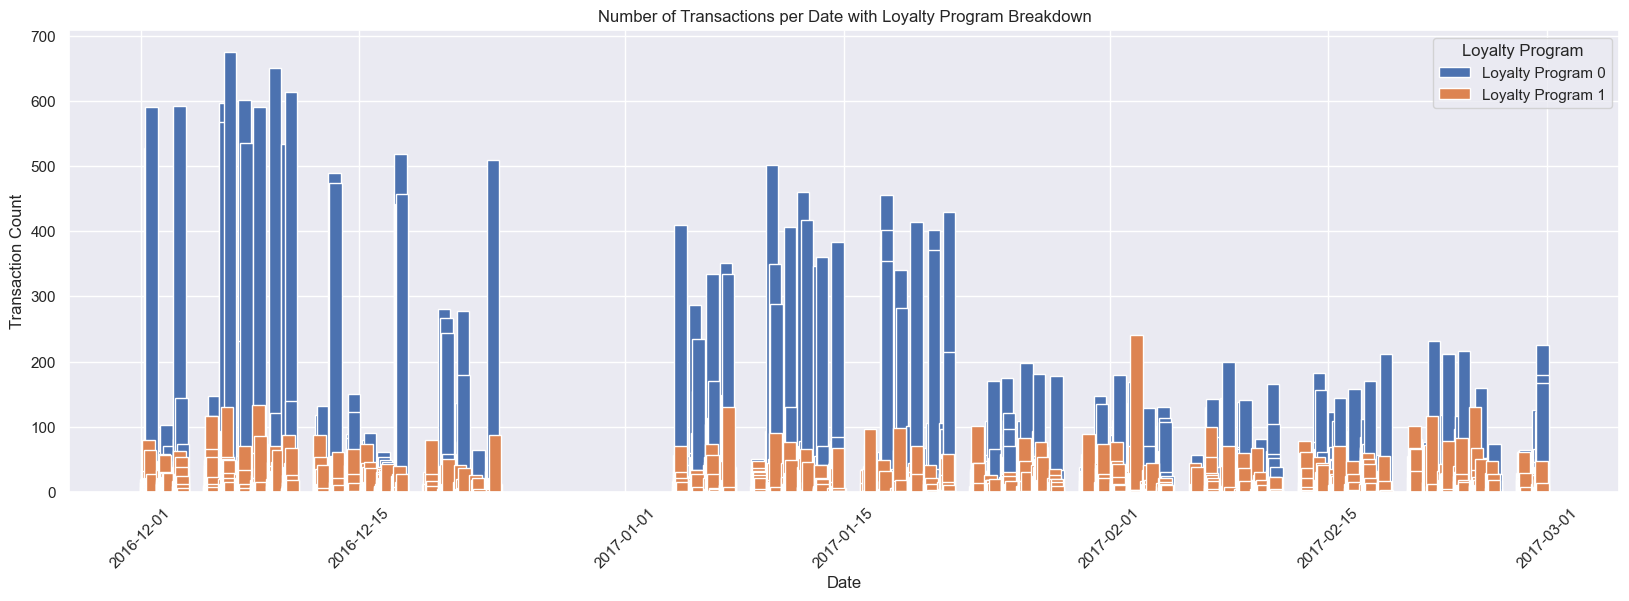

In [202]:
# Calculate the number of transactions per date with loyalty_program breakdown
transactions_per_date = new_retail_modified.groupby(['purchase_date', 'loyalty_program']).size().reset_index(name='Transaction Count')

# Create a new DataFrame for each loyalty_program category
loyalty_program_0 = transactions_per_date[transactions_per_date['loyalty_program'] == 0]
loyalty_program_1 = transactions_per_date[transactions_per_date['loyalty_program'] == 1]

plt.figure(figsize=(20, 6))

# Plot the transactions for loyalty_program 
plt.bar(loyalty_program_0['purchase_date'], loyalty_program_0['Transaction Count'], label='Loyalty Program 0')
plt.bar(loyalty_program_1['purchase_date'], loyalty_program_1['Transaction Count'], label='Loyalty Program 1')

plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Number of Transactions per Date with Loyalty Program Breakdown')

plt.xticks(rotation=45)

plt.legend(title='Loyalty Program')
plt.show()

**Conclusion :**

- Based on transaction data, only a small portion of transactions are made by customers who have a loyalty program.
- Customers without a loyalty program are always larger than customer transactions with a loyalty program except for the beginning of February.

#### Number of Customers

<a id='442'></a>Calculate the total number of users, the number of loyal and non-loyal users, the number of users by shop.

In [203]:
# Exclude rows with customer_id = 0
filtered_data = new_retail_modified[new_retail_modified['customer_id'] != 0]
total_users = filtered_data['customer_id'].nunique()

print('Total number of users:', total_users)

Total number of users: 1750


In [204]:
# Group by loyalty program and calculate the count of unique customer IDs
customer_count_by_loyalty_program = filtered_data.groupby('loyalty_program')['customer_id'].nunique().reset_index()

# Calculate the percentage contribution of each loyalty program category
customer_count_by_loyalty_program['%'] = (customer_count_by_loyalty_program['customer_id'] / total_users) * 100

customer_count_by_loyalty_program.reset_index()

,index,loyalty_program,customer_id,%
0,0,0,1163,66.457143
1,1,1,587,33.542857


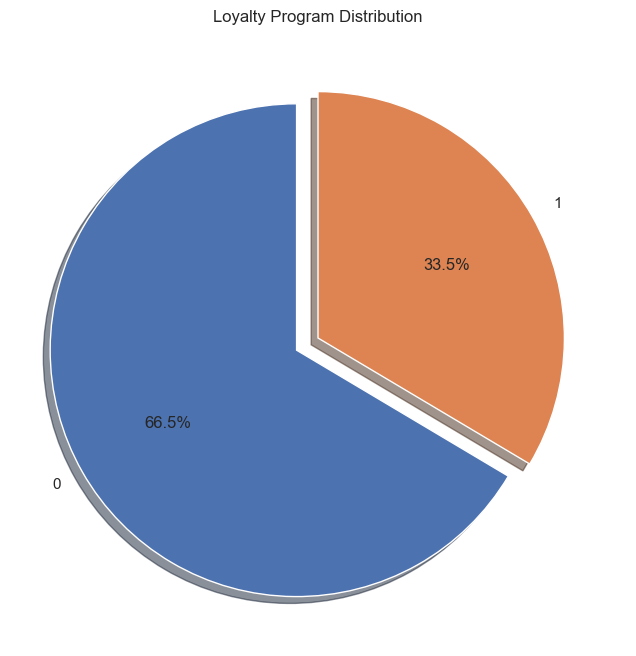

In [205]:
# Create a pie chart
labels = customer_count_by_loyalty_program['loyalty_program']
sizes = customer_count_by_loyalty_program['%']
explode = (0.1, 0) 

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Loyalty Program Distribution')
sns.set()

plt.show()

Only 33.5% or 587 users join program_loyalty. The majority of users have not used the loyalty program in their transactions.

In [206]:
filtered_data['customer_id'].nunique()

1750

In [207]:
# Group by shop and count the number of users
users_by_shop = filtered_data.groupby('shop_id')['customer_id'].nunique().reset_index()
users_by_shop.sort_values(by='customer_id', ascending=False)

,shop_id,customer_id
28,Shop 7,139
0,Shop 0,138
26,Shop 5,138
11,Shop 19,138
19,Shop 26,135
9,Shop 17,134
1,Shop 1,133
15,Shop 22,133
3,Shop 11,132
30,Shop 9,131


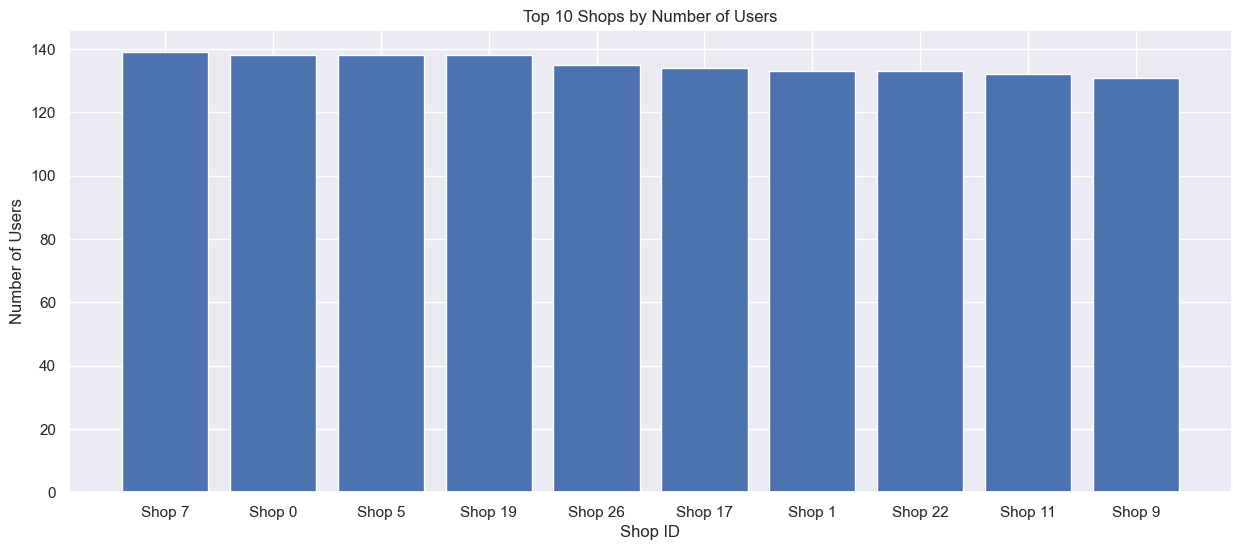

In [208]:
users_by_shop_sorted = users_by_shop.sort_values(by='customer_id', ascending=False)
top_10_shops = users_by_shop_sorted.head(10)

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_10_shops['shop_id'], top_10_shops['customer_id'])
plt.xlabel('Shop ID')
plt.ylabel('Number of Users')
plt.title('Top 10 Shops by Number of Users')
plt.show()

Of all the stores, Shop 7 is the shop with the most customers. And the gap with other stores is not too significant.

In [209]:
customers_by_shop_loyalty = filtered_data.groupby(['shop_id', 'loyalty_program'])['customer_id'].count()
customers_by_shop_loyalty = customers_by_shop_loyalty.unstack(level='loyalty_program').reset_index()
customers_by_shop_loyalty.columns = ['shop_id','non_loyal', 'loyal']

# Calculate the percentage of non-loyal and loyal customers
customers_by_shop_loyalty['% non_loyal'] = (customers_by_shop_loyalty['non_loyal'] / 
                                    (customers_by_shop_loyalty['non_loyal'] + customers_by_shop_loyalty['loyal'])) * 100
customers_by_shop_loyalty['% loyal'] = (customers_by_shop_loyalty['loyal'] / 
                                    (customers_by_shop_loyalty['non_loyal'] + customers_by_shop_loyalty['loyal'])) * 100

# Round the percentage values to 2 decimal places
customers_by_shop_loyalty['% non_loyal'] = customers_by_shop_loyalty['% non_loyal'].round(2)
customers_by_shop_loyalty['% loyal'] = customers_by_shop_loyalty['% loyal'].round(2)

customers_by_shop_loyalty.sort_values(by='loyal', ascending=False)

,shop_id,non_loyal,loyal,% non_loyal,% loyal
5,Shop 13,1382,1021,57.51,42.49
12,Shop 2,1224,998,55.09,44.91
17,Shop 24,1654,962,63.23,36.77
1,Shop 1,1733,945,64.71,35.29
3,Shop 11,1352,919,59.53,40.47
15,Shop 22,1623,896,64.43,35.57
19,Shop 26,1417,879,61.72,38.28
0,Shop 0,37451,835,97.82,2.18
7,Shop 15,1851,824,69.20,30.80
30,Shop 9,1616,823,66.26,33.74


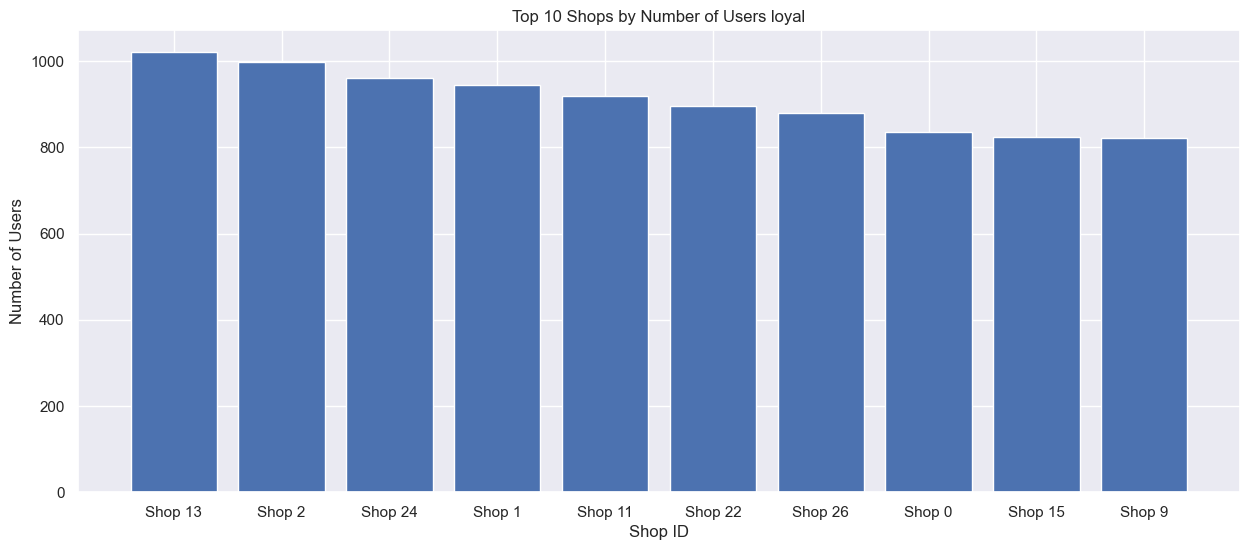

In [210]:
# Sort the DataFrame by the number of loyal customers in descending order
top_10_loyal_customers = customers_by_shop_loyalty.sort_values(by='loyal', ascending=False).head(10)
top_10_loyal_customers

# Create a bar chart
plt.figure(figsize=(15, 6))
plt.bar(top_10_loyal_customers['shop_id'], top_10_loyal_customers['loyal'])
plt.xlabel('Shop ID')
plt.ylabel('Number of Users')
plt.title('Top 10 Shops by Number of Users loyal')
plt.show()

For shops with customers using loyalty programs, shop 13 is the highest and the difference between loyalty program users between stores in the top 10 is not that great.

#### Number of Purchases per Customer

<a id='443'></a>Calculate the number of purchases per customer, the number of purchases per loyal and non-loyal customers, the number of purchases per customer by shop.

In [211]:
jumlah_pembelian = len(new_retail_modified)

jumlah_pelanggan_unik = new_retail_modified["customer_id"].nunique()

rata_rata_pembelian_per_pelanggan = jumlah_pembelian / jumlah_pelanggan_unik

print("Jumlah Pembelian:", jumlah_pembelian)
print("Jumlah Pelanggan Unik:", jumlah_pelanggan_unik)
print("Rata-rata Pembelian per Pelanggan:", rata_rata_pembelian_per_pelanggan)

Jumlah Pembelian: 104134
Jumlah Pelanggan Unik: 1750
Rata-rata Pembelian per Pelanggan: 59.50514285714286


In [212]:
jumlah_pembelian_per_loyalty = new_retail_modified.groupby('loyalty_program')['purchase_id'].count()

jumlah_pelanggan_loyal = new_retail_modified[new_retail_modified["loyalty_program"] == 1]["customer_id"].nunique()

jumlah_pelanggan_nonloyal = new_retail_modified[new_retail_modified["loyalty_program"] == 0]["customer_id"].nunique()

rata_rata_pembelian_per_pelanggan_loyal = jumlah_pembelian_per_loyalty[1] / jumlah_pelanggan_loyal

rata_rata_pembelian_per_pelanggan_nonloyal = jumlah_pembelian_per_loyalty[0] / jumlah_pelanggan_nonloyal

print("Jumlah Pelanggan Loyal:", jumlah_pelanggan_loyal)
print("Jumlah Pelanggan Non-Loyal:", jumlah_pelanggan_nonloyal)
print("Rata-rata Pembelian per Pelanggan Loyal:", rata_rata_pembelian_per_pelanggan_loyal)
print("Rata-rata Pembelian per Pelanggan Non-Loyal:", rata_rata_pembelian_per_pelanggan_nonloyal)

Jumlah Pelanggan Loyal: 587
Jumlah Pelanggan Non-Loyal: 1163
Rata-rata Pembelian per Pelanggan Loyal: 39.77342419080068
Rata-rata Pembelian per Pelanggan Non-Loyal: 69.46431642304385


There is a difference between the average purchase per customer between loyal and non-loyal customers. Loyal customers have an average of 39 purchases per customer, while non-loyal customers have an average of 69 purchases per customer. The average purchase per non-loyal customer is greater than the average purchase per loyal customer.

In [213]:
total_purchase_per_shop = new_retail_modified.groupby('shop_id')['purchase_id'].count()

unique_users_per_shop = new_retail_modified.groupby('shop_id')['customer_id'].nunique()

purchase_per_user_ratio = total_purchase_per_shop / unique_users_per_shop

result = pd.concat([total_purchase_per_shop, unique_users_per_shop, purchase_per_user_ratio], axis=1)
result.columns = ['total_purchase', 'unique_users', 'purchase_per_user_ratio']
result.reset_index().sort_values(by='purchase_per_user_ratio', ascending=False)

,shop_id,total_purchase,unique_users,purchase_per_user_ratio
0,Shop 0,38286,138,277.434783
7,Shop 15,2675,130,20.576923
1,Shop 1,2678,133,20.135338
17,Shop 24,2616,131,19.969466
24,Shop 30,2355,122,19.303279
18,Shop 25,1897,100,18.970000
15,Shop 22,2519,133,18.939850
2,Shop 10,2177,115,18.930435
5,Shop 13,2403,128,18.773438
30,Shop 9,2439,131,18.618321


The highest purchases per user were at shop 0, which was 277. A very significant figure compared to other shops. Meanwhile, the lowest purchase per user is shop 21.

#### Average Purchase Size
<a id='444'></a>average purchase based on loyalty program and non loyalty program.

In [214]:
new_retail_modified.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id
0,538280,21873,11.0,2016-12-10 12:50:00,18427,0,Shop 3
1,538862,22195,2.0,2016-12-14 14:11:00,22389,1,Shop 2
2,538855,21239,7.0,2016-12-14 13:50:00,22182,1,Shop 3
3,543543,22271,2.0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,2.0,2017-02-13 14:40:00,23151,1,Shop 28


In [215]:
# Calculating average purchase size by loyalty program
loyal_customers = new_retail_modified[new_retail_modified['loyalty_program'] == 1]
average_quantity_loyal = loyal_customers['quantity'].mean()

non_loyal_customers = new_retail_modified[new_retail_modified['loyalty_program'] == 0]
average_quantity_non_loyal = non_loyal_customers['quantity'].mean()

# Output
print("Average Purchase Size for Loyalty Program Customers:", average_quantity_loyal)
print("Average Purchase Size for Non-Loyalty Program Customers:", average_quantity_non_loyal)

Average Purchase Size for Loyalty Program Customers: 5.243564483659571
Average Purchase Size for Non-Loyalty Program Customers: 4.80166363400052


#### Purchase Frequency for Loyalty Program Members/Non-Members.

<a id='445'></a>Frequency of purchases for loyalty programs and non-loyalty programs.

In [216]:
# Calculating frequency of purchases by loyalty program
loyal_customers_freq = new_retail_modified[new_retail_modified['loyalty_program'] == 1].shape[0]

non_loyal_customers_freq = new_retail_modified[new_retail_modified['loyalty_program'] == 0].shape[0]

# Output
print("Frequency of Purchases for Loyalty Program Customers:", loyal_customers_freq)
print("Frequency of Purchases for Non-Loyalty Program Customers:", non_loyal_customers_freq)

Frequency of Purchases for Loyalty Program Customers: 23347
Frequency of Purchases for Non-Loyalty Program Customers: 80787


### Multivariate Analysis

<a id='45'></a>
Multivariate analysis refers to statistical techniques used to analyze and understand the relationship between several variables simultaneously. This involves examining how the various variables in the dataset interact with each other and how they collectively contribute to the overall pattern or result.

In [217]:
retail_merge = pd.merge(new_retail_modified, product, left_on='item_id', right_on='product_id')

retail_merge['total_sales'] = retail_merge['price_per_one'] * retail_merge['quantity']

retail_merge.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_sales
0,538280,21873,11.0,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.62
1,541104,21873,2.0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.84
2,540418,21873,1.0,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.42
3,541516,21873,2.0,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.84
4,541566,21873,14.5,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,6.09


C:\Users\USER\AppData\Local\Temp\ipykernel_10060\3157265126.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = retail_merge.corr()


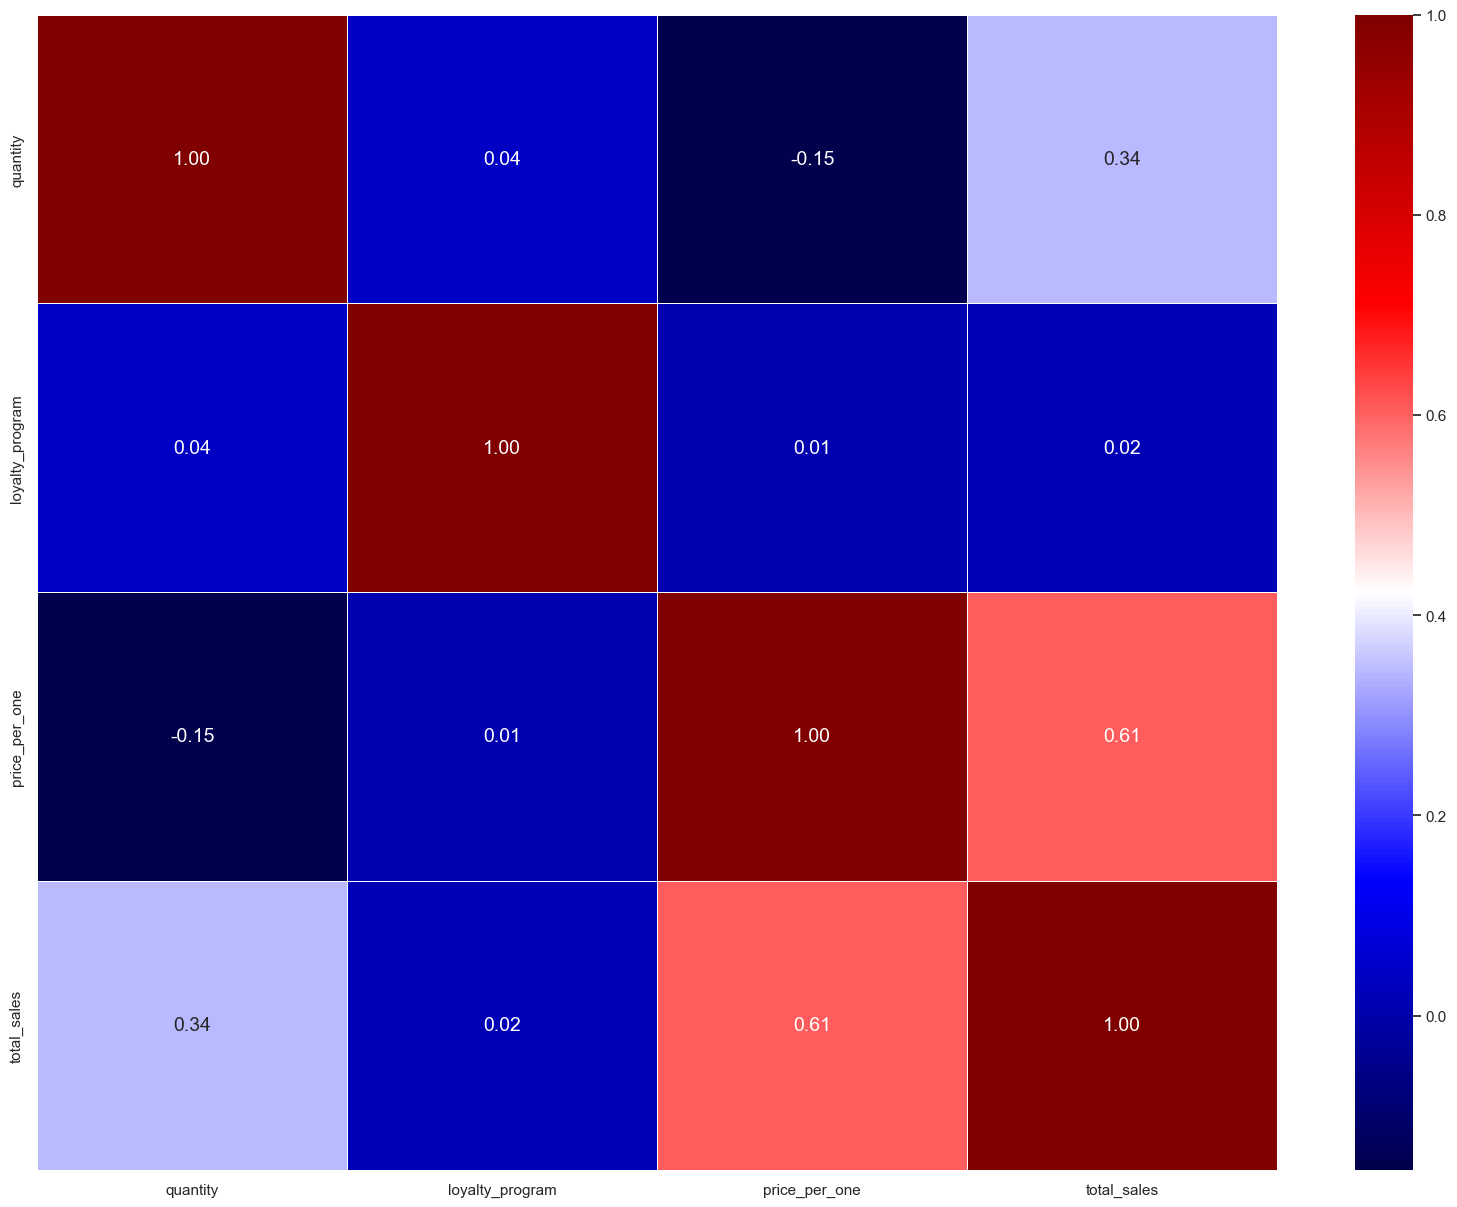

In [218]:
corr_matrix = retail_merge.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', linewidths=0.5, cmap="seismic", annot_kws={"fontsize": 14})

plt.show()

In [219]:
churn_corr = retail_merge.corr()["total_sales"].sort_values(ascending=False)
churn_corr_table = pd.DataFrame(churn_corr)
churn_corr_table.columns = ["Correlation with total sales"]
churn_corr_table

C:\Users\USER\AppData\Local\Temp\ipykernel_10060\990549591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = retail_merge.corr()["total_sales"].sort_values(ascending=False)


,Correlation with total sales
total_sales,1.000000
price_per_one,0.606891
quantity,0.344908
loyalty_program,0.021536


Overall, this analysis shows that price per item has the strongest positive correlation with total sales, followed by quantity purchased. However, the correlation between loyalty program status and total sales is very small.

In [220]:
churn_corr = retail_merge.corr()["quantity"].sort_values(ascending=False)
churn_corr_table = pd.DataFrame(churn_corr)
churn_corr_table.columns = ["Correlation with quantity"]
churn_corr_table

C:\Users\USER\AppData\Local\Temp\ipykernel_10060\2456953279.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_corr = retail_merge.corr()["quantity"].sort_values(ascending=False)


,Correlation with quantity
quantity,1.000000
total_sales,0.344908
loyalty_program,0.040314
price_per_one,-0.153907


- There is a weak positive correlation between quantity and total sales (correlation coefficient of 0.345). This shows that the higher the quantity of goods purchased, the total sales tend to also increase, although the relationship is not strong.


- There is a very weak positive correlation between the quantity and status of the loyalty program (correlation coefficient of 0.039). This shows that membership in a loyalty program has a very small effect on the quantity of goods purchased.


- Price per unit: There is a weak negative correlation between quantity and price per item (correlation coefficient of -0.154). This indicates that when the price per item increases, the quantity purchased tends to decrease, and vice versa.

### Cohort Analysis

<a id='46'></a>
A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves over time and compare it to other cohorts.

#### Retention by Month

<a id='462'></a>A measurement method used to monitor and analyze the retention rate of users or customers in a product, service or platform over a specified period of time, measured in months.

In [221]:
def get_month_start_date(x): return dt.datetime(x.year, x.month, 1).strftime("%Y-%m-%d")
retail_merge['MonthStartDate'] = retail_merge['purchase_date'].apply(get_month_start_date)
retail_merge.tail()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_sales,MonthStartDate
104129,538852,90058B,14.5,2016-12-14 13:33:00,23051,1,Shop 8,90058B,0.38,5.51,2016-12-01
104130,539988,46138B,1.0,2016-12-23 16:06:00,23795,1,Shop 14,46138B,1.95,1.95,2016-12-01
104131,537025,90053,2.0,2016-12-03 16:21:00,0,0,Shop 0,90053,2.55,5.10,2016-12-01
104132,542731,17028J,5.0,2017-01-31 15:27:00,19279,0,Shop 0,17028J,0.42,2.10,2017-01-01
104133,C540246,79320,2.0,2017-01-05 15:43:00,18760,0,Shop 19,79320,4.95,9.90,2017-01-01


In [222]:
month_map = dict(zip(retail_merge['MonthStartDate'].unique(), range(len(retail_merge['MonthStartDate'].unique()))))
retail_merge['InvoiceMonthID'] = retail_merge['MonthStartDate'].map(month_map)
retail_merge['CohortMonthID'] = retail_merge.groupby('customer_id')['InvoiceMonthID'].transform('min')
retail_merge['CohortMonth'] = retail_merge['CohortMonthID'].map(dict(zip(month_map.values(), month_map.keys())))
retail_merge['CohortIndexMonth'] = retail_merge['InvoiceMonthID'] - retail_merge['CohortMonthID']

In [223]:
retail_merge.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,loyalty_program,shop_id,product_id,price_per_one,total_sales,MonthStartDate,InvoiceMonthID,CohortMonthID,CohortMonth,CohortIndexMonth
0,538280,21873,11.0,2016-12-10 12:50:00,18427,0,Shop 3,21873,0.42,4.62,2016-12-01,0,0,2016-12-01,0
1,541104,21873,2.0,2017-01-13 14:29:00,0,0,Shop 0,21873,0.42,0.84,2017-01-01,1,0,2016-12-01,1
2,540418,21873,1.0,2017-01-07 11:04:00,0,0,Shop 0,21873,0.42,0.42,2017-01-01,1,0,2016-12-01,1
3,541516,21873,2.0,2017-01-18 17:34:00,0,0,Shop 0,21873,0.42,0.84,2017-01-01,1,0,2016-12-01,1
4,541566,21873,14.5,2017-01-19 11:50:00,23401,1,Shop 22,21873,0.42,6.09,2017-01-01,1,0,2016-12-01,1


In [224]:
#Count monthly active customers from each cohort
grouping = retail_merge.groupby(['CohortMonth', 'CohortIndexMonth'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndexMonth',values='customer_id')
cohort_counts

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,949.0,363.0,318.0
2017-01-01,421.0,101.0,NaN
2017-02-01,380.0,NaN,NaN


In [225]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) 
retention.round(3) * 100 

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,100.0,38.3,33.5
2017-01-01,100.0,24.0,NaN
2017-02-01,100.0,NaN,NaN


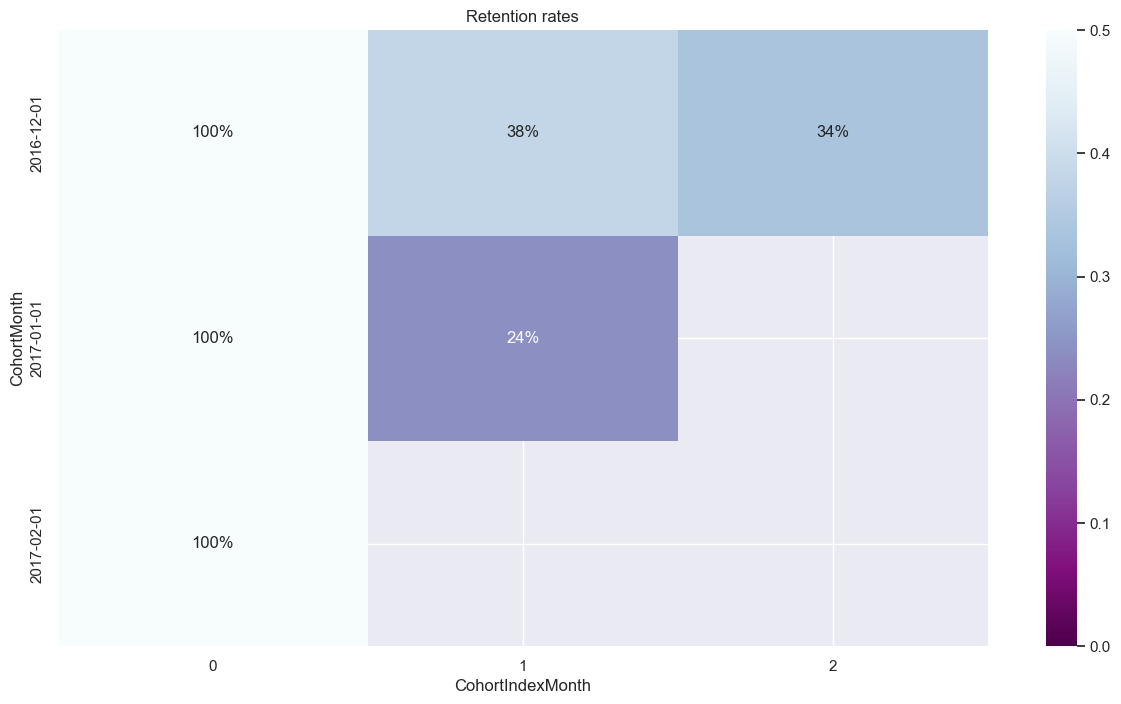

In [226]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

**Conclusion :**

- Retention rate by month is quite small, in month 12 there are 949 users but only 38% in the second month and 34% in the second month.


- Retention Rate in month 1 is even lower. Out of 421 users only 24% returned users in the second month.

#### Loyalty Retention Program

<a id='462'></a>A program designed and implemented by a company or organization with the aim of maintaining and strengthening long-term relationships with their customers or users. This program aims to increase customer loyalty, encourage users to stay engaged with products or services, as well as increase retention rates.

In [227]:
loyal_program = retail_merge[retail_merge['loyalty_program'] == 1]
non_loyal_program = retail_merge[retail_merge['loyalty_program'] == 0]

In [228]:
#Count monthly active customers from each cohort
grouping = loyal_program.groupby(['CohortMonth', 'CohortIndexMonth'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndexMonth',values='customer_id')
cohort_counts

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,344.0,115.0,121.0
2017-01-01,124.0,30.0,NaN
2017-02-01,119.0,NaN,NaN


In [229]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,100.0,33.4,35.2
2017-01-01,100.0,24.2,NaN
2017-02-01,100.0,NaN,NaN


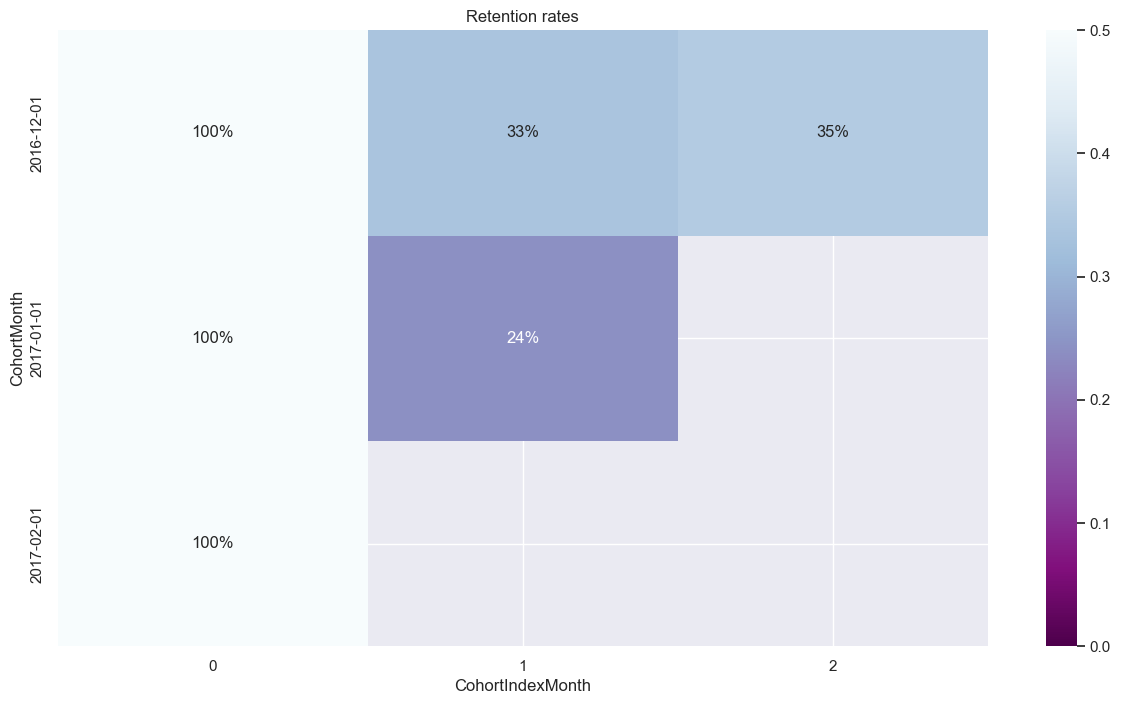

In [230]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

In [231]:
#Count monthly active customers from each cohort
grouping = non_loyal_program.groupby(['CohortMonth', 'CohortIndexMonth'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndexMonth',values='customer_id')
cohort_counts

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,605.0,248.0,197.0
2017-01-01,297.0,71.0,NaN
2017-02-01,261.0,NaN,NaN


In [232]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndexMonth,0,1,2
CohortMonth,,,
2016-12-01,100.0,41.0,32.6
2017-01-01,100.0,23.9,NaN
2017-02-01,100.0,NaN,NaN


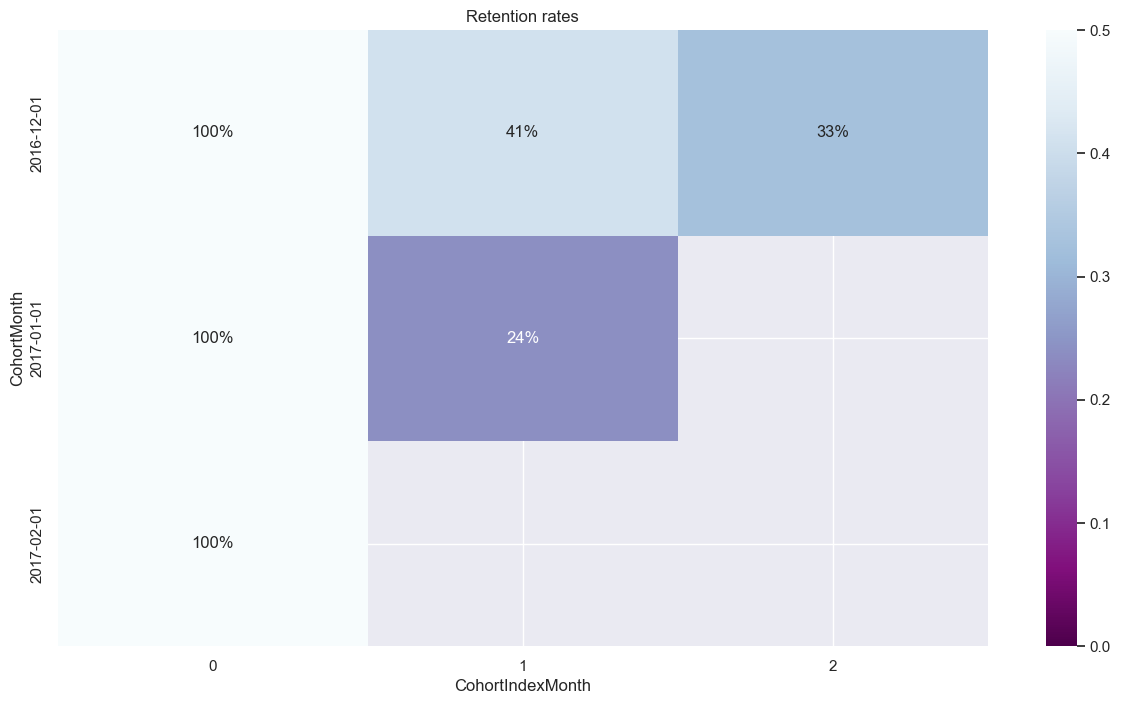

In [233]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

**Conclusion :**

- Customer retention with a loyalty program does not show a better comparison than retention with users without a loyalty program.

- Customer retention without a loyalty program is higher in the first month, namely 41% compared to users with a loyalty program, only 33% in the first month. Meanwhile, in the second month, users with a higher loyalty program were 35% and 35% without a loyalty program.

## Hypothesis Test

<a id='test'></a>
Menguji hipotesis dengan mengecek distribusinya terlebih dahulu.

In [234]:
columns_to_test = ['quantity', 'price_per_one', 'total_sales']

for column in columns_to_test:
    stat, p_value = st.shapiro(retail_merge[column])
    alpha = 0.05
    
    print(f"Column: {column}")
    print(f"Shapiro-Wilk test statistic: {stat}")
    print(f"p-value: {p_value}")

    if p_value < alpha:
        print("Hipotesis nol ditolak: distribusinya tidak normal.")
    else:
        print("Gagal menolak hipotesis nol: distribusinya terlihat normal")
    
    print("---------------------------------------------------")


Column: quantity
Shapiro-Wilk test statistic: 0.7452937960624695
p-value: 0.0
Hipotesis nol ditolak: distribusinya tidak normal.
---------------------------------------------------
Column: price_per_one
Shapiro-Wilk test statistic: 0.37516772747039795
p-value: 0.0
Hipotesis nol ditolak: distribusinya tidak normal.
---------------------------------------------------
Column: total_sales
Shapiro-Wilk test statistic: 0.5311025381088257
p-value: 0.0
Hipotesis nol ditolak: distribusinya tidak normal.
---------------------------------------------------


c:\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Before carrying out the hypothesis test process, we check the distribution of the data, so that we can determine the right test method.

**Hypothesis statement :**

- Null hypothesis (H0): There is no significant difference between the number of items between the loyalty member group and the non-loyalty member group.


- Alternative hypothesis (H1): There is a significant difference between the number of items between the loyalty member group and the non-loyalty member group.

In [235]:
loyalty_members = retail_merge[retail_merge['loyalty_program'] == 1]
non_loyalty_members = retail_merge[retail_merge['loyalty_program'] == 0]

min_sample_size = min(len(loyalty_members), len(non_loyalty_members))
loyalty_members = loyalty_members.sample(n=min_sample_size, random_state=42)
non_loyalty_members = non_loyalty_members.sample(n=min_sample_size, random_state=42)

alpha = 0.05

statistic, p_value = wilcoxon(loyalty_members['quantity'], non_loyalty_members['quantity'])

print('Uji Wilcoxon signed-rank test:')
print(f"Statistik uji: {statistic}")
print(f"Nilai p: {p_value}")
print()
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the number of items between the loyalty member group and the non-loyalty member group.")
else:
    print("There is not enough evidence to reject the null hypothesis. There is no significant difference between the number of items between the loyalty member group \
        and the non-loyalty member group.")

Uji Wilcoxon signed-rank test:
Statistik uji: 78691898.5
Nilai p: 4.4824403569261315e-28

The null hypothesis is rejected. There is a significant difference between the number of items between the loyalty member group and the non-loyalty member group.


**Conclusion :**

- Based on the very small p-value (smaller than the specified level of significance), we can conclude that there is a significant difference between the purchase size of loyalty program members and non-members.


- We can reject the null hypothesis that there is no significant difference and accept the alternative hypothesis that the average purchase size is significantly higher for loyalty program members than for non-members.


- Based on the results of statistical tests, we can conclude that loyalty program members tend to have a significantly higher purchase size than non-members.

**Hypothesis statement :**

- Null hypothesis (H0): There is no significant difference between the price per unit of product between the loyalty member group and the non-loyalty member group.


- Alternative hypothesis (H1): There is a significant difference between the price per unit of product between the loyalty member group and the non-loyalty member group.

In [236]:
statistic, p_value = wilcoxon(loyalty_members['price_per_one'], non_loyalty_members['price_per_one'])

print('Uji Wilcoxon signed-rank test:')
print(f"Statistik uji: {statistic}")
print(f"Nilai p: {p_value}")
print()
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the price per one product unit between the loyalty member group and the non-loyalty member group.")
else:
    print("There is not enough evidence to reject the null hypothesis. There is no significant difference between the price per unit of product between the loyalty member group \
          and the non-loyalty member group.")

Uji Wilcoxon signed-rank test:
Statistik uji: 118448902.5
Nilai p: 5.341625093243979e-05

The null hypothesis is rejected. There is a significant difference between the price per one product unit between the loyalty member group and the non-loyalty member group.


The test statistic describes how big the difference is between the two sets of data you're testing. The p-value, on the other hand, is the probability of getting a result that is at least as extreme or more extreme than the observed one, if the null hypothesis is true. In this context, if the p-value is very small (less than the specified level of significance), then we can conclude that there is a significant difference between the two groups of data you are testing.

**Hypothesis statement :**

- Null hypothesis (H0): There is no significant difference in total sales between the loyalty member group and the non-loyalty member group.

- Alternative hypothesis (H1): There is a significant difference between total sales between the loyalty member group and the non-loyalty member group.

In [237]:
statistic, p_value = wilcoxon(loyalty_members['total_sales'], non_loyalty_members['total_sales'])

print('Uji Wilcoxon signed-rank test:')
print(f"Statistik uji: {statistic}")
print(f"Nilai p: {p_value}")
print()
if p_value < alpha:
    print("The null hypothesis is rejected. There is a significant difference between the total sales between the loyalty member group and the non-loyalty member group.")
else:
    print("There is not enough evidence to reject the null hypothesis. There is no significant difference in total sales between the loyalty member group and \
        the non-loyalty member group.")

Uji Wilcoxon signed-rank test:
Statistik uji: 118846101.0
Nilai p: 1.230708467677431e-19

The null hypothesis is rejected. There is a significant difference between the total sales between the loyalty member group and the non-loyalty member group.


**Conclusion :**

- In this context, if the resulting p-value (1.230708467677431e-19) is smaller than the specified significance level, then we can reject the null hypothesis and accept the alternative hypothesis.


- This will indicate that there is a significant difference in the total sales between the loyalty member group and the non-loyalty member group.

##Conclusion

<a id='kesimpulan'></a>
At this stage we draw conclusions from the analysis process and provide advice on business decisions.

- This dataset contains retail data from 1 December 2016 to 28 February 2017 or about 3 months. Transactions do not occur every day, especially from the end of December to January 1. There may be no transactions due to the year-end holiday. The highest transaction was at the beginning of December, after that the transaction rose and fell but never exceeded the highest transaction in December.


- Only 33.5% or 587 users join program_loyalty. The majority of users have not used the loyalty program in their transactions. For shops with customers using the loyalty program, shop 13 then shop 2 and shop 24.


- There is a difference between the average purchase per customer between loyal and non-loyal customers. Loyal customers have an average of 39 purchases per customer, while non-loyal customers have an average of 69 purchases per customer. The average purchase per non-loyal customer is greater than the average purchase per loyal customer.


- Overall, this analysis shows that price per item has the strongest positive correlation with total sales, followed by quantity purchased. However, the correlation between loyalty program status and total sales is very small.


- Customer retention with a loyalty program does not show a better comparison than retention with users without a loyalty program. Customer retention without a loyalty program is higher in the first month, namely 41% compared to users with a loyalty program, only 33% in the first month. Whereas in the second month users with a higher loyalty program were 35% and 33% without a loyalty program.


- Based on the very small p-value (smaller than the specified level of significance), we can conclude that there is a significant difference between the purchase size of loyalty program members and non-members. We can reject the null hypothesis that there is no significant difference and accept the alternative hypothesis that the average purchase size is significantly higher for loyalty program members than for nonmembers. Based on the results of statistical tests, we can conclude that loyalty program members tend to have a significantly higher purchase size than non-members.


- Member fees $ 20 per month, discount or other benefits need to be reviewed. This refers to purchases per loyal customer which are still smaller than non-loyal customers. Loyalty program customer retention also did not increase significantly compared to non-loyalty customer retention. If there is no improvement in the loyalty program benefits, it is likely that customers tend to choose transactions without a loyalty program.

Link Dashboard : https://public.tableau.com/views/Final-Project_16897547863000/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link 

Persentation : https://drive.google.com/file/d/10rY9d6wPO8aA4ag-1ZAHtAg-sB5Dx3qp/view?usp=sharing